# Production facility 02 - Production Demand Patterns
*This notebook illustrates methods to explore the demand patterns of a set of parts.*
***
Alessandro Tufano, Ph.D. 2021

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package
import os

import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe


### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from analogistics.data.data_generator_distribution import generateDistributionData

#random generation of distribution data
_, _, _, D_mov = generateDistributionData(num_movements=2500, num_parts = 100)


In [4]:
#print nodes dataframe
display(HTML(D_mov.head().to_html()))

,LOADING_NODE,LOADING_NODE_DESCRIPTION,LOADING_NODE_LATITUDE,LOADING_NODE_LONGITUDE,PTA_FROM,PTD_FROM,ATA_FROM,ATD_FROM,DISCHARGING_NODE,DISCHARGING_NODE_DESCRIPTION,DISCHARGING_LATITUDE,DISCHARGING_LONGITUDE,PTA_TO,PTD_TO,ATA_TO,ATD_TO,ITEMCODE,PRODUCT_FAMILY,CLIENT,VEHICLE_CODE,VOYAGE_CODE,QUANTITY,TIMESTAMP_IN,PACKAGE_DESCRIPTION,USER
0,10,NODE_10,41.732747,14.535150,2020-01-02 00:00:00.000000,2020-01-02 01:00:00.000000,2020-01-01 23:54:14.886458,2020-01-02 00:50:07.410775,11,NODE_11,41.451329,14.704591,2020-01-02 06:19:51.705647,2020-01-02 07:19:51.705647,2020-01-02 06:25:32.872509,2020-01-02 07:35:49.488520,56,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,9.710975,2019-12-23 18:07:25.591105,TEU CONTAINER,USER_3
0,15,NODE_15,41.936301,14.246993,2020-01-02 08:31:50.361561,2020-01-02 09:31:50.361561,2020-01-02 08:38:09.719742,2020-01-02 09:32:34.578899,14,NODE_14,41.764540,14.590790,2020-01-02 17:18:07.670422,2020-01-02 18:18:07.670422,2020-01-02 17:25:13.123462,2020-01-02 18:27:27.594391,2,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,6.263532,2019-12-30 03:07:59.639989,FEU CONTAINER,USER_7
0,9,NODE_9,41.881105,14.481204,2020-01-02 19:43:04.967429,2020-01-02 20:43:04.967429,2020-01-02 19:25:41.967357,2020-01-02 20:37:01.073210,19,NODE_19,41.926659,14.618539,2020-01-03 01:56:37.333958,2020-01-03 02:56:37.333958,2020-01-03 01:52:38.084845,2020-01-03 02:58:17.938615,7,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,9.994689,2019-12-17 02:06:05.492908,FEU CONTAINER,USER_1
0,18,NODE_18,41.687198,14.190457,2020-01-03 04:36:22.963395,2020-01-03 05:36:22.963395,2020-01-03 04:42:09.935135,2020-01-03 05:43:45.418110,17,NODE_17,41.904684,14.113763,2020-01-03 12:22:02.332947,2020-01-03 13:22:02.332947,2020-01-03 12:06:24.337926,2020-01-03 13:34:41.290396,97,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,2.182114,2019-12-27 09:41:28.941988,TEU CONTAINER,USER_6
0,24,NODE_24,41.864799,14.760454,2020-01-03 14:12:46.171300,2020-01-03 15:12:46.171300,2020-01-03 14:15:31.880883,2020-01-03 15:34:03.119971,2,NODE_2,41.474641,14.355257,2020-01-04 15:47:50.655958,2020-01-04 16:47:50.655958,2020-01-04 16:02:19.047064,2020-01-04 16:23:58.662564,93,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,0,5.737345,2019-12-30 08:52:26.220566,TEU CONTAINER,USER_6


### Create folder hierarchy

In [5]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
root_path = os.path.join(pathResults,f"{string_casestudy}_results")
prediction_results_path = os.path.join(root_path,f"P9_predictions")

os.makedirs(root_path, exist_ok=True)
os.makedirs(prediction_results_path, exist_ok=True)

### Calculate ADI and CV2

In [6]:
from analogistics.supply_chain.P1_family_problem.part_classification import calculateADICV2

#set column parameters
itemfield='ITEMCODE' #column name with itemcode 
qtyfield = 'QUANTITY' #column name with quantity
dateVar = 'TIMESTAMP_IN'

D_demandPatterns = calculateADICV2(D_mov, itemfield, qtyfield, dateVar)
    

In [7]:
#print demand patterns dataframe
display(HTML(D_demandPatterns.head().to_html()))

,ITEMCODE,ADI,CV2
0,0,0.016617,0.238884


### Plot demand patterns

In [8]:
#set the relative importance of each part
D_demandPatterns['frequency']=1

(<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 0,
 1,
 0,
 0)

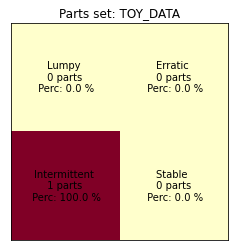

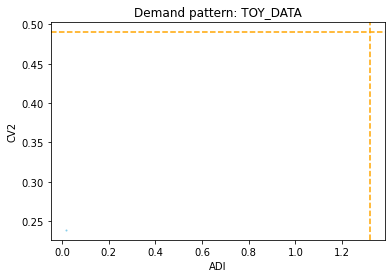

In [9]:
from analogistics.supply_chain.P1_family_problem.part_classification import demandPatternADICV2
demandPatternADICV2(D_demandPatterns, string_casestudy, draw=True)